# EDA

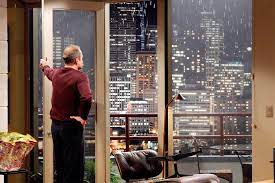

Import the basic libraries and set the pandas format for floats

In [253]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from matplotlib.ticker import PercentFormatter

plt.rcParams.update(
    {"figure.figsize": (8, 5), "axes.facecolor": "white", "axes.edgecolor": "black"}
)
plt.rcParams["figure.facecolor"] = "w"
pd.plotting.register_matplotlib_converters()
pd.set_option("display.float_format", lambda x: "%.3f" % x)

Import the data from .csv file

In [254]:
df = pd.read_csv("data/eda.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

### Clean data

In [255]:
df.drop(columns=["house_id", "id.1"], inplace=True)

rename columns

In [256]:
df.rename(
    columns={
        "yr_built": "year_built",
        "yr_renovated": "year_renovated",
        "long": "lon",
        "date": "sales_date",
    },
    inplace=True,
)
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'year_built', 'year_renovated', 'zipcode', 'lat',
       'lon', 'sqft_living15', 'sqft_lot15', 'sales_date', 'price'],
      dtype='object')

In [257]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,year_built,year_renovated,zipcode,lat,lon,sqft_living15,sqft_lot15,sales_date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000


check for duplicated rows

In [258]:
df.duplicated().value_counts()

False    21597
dtype: int64

In [259]:
df.dtypes

id                  int64
bedrooms          float64
bathrooms         float64
sqft_living       float64
sqft_lot          float64
floors            float64
waterfront        float64
view              float64
condition           int64
grade               int64
sqft_above        float64
sqft_basement     float64
year_built          int64
year_renovated    float64
zipcode             int64
lat               float64
lon               float64
sqft_living15     float64
sqft_lot15        float64
sales_date         object
price             float64
dtype: object

bring year_renovated to correct year by dividing by 10

In [260]:
df.year_renovated = df.year_renovated / 10

fill all NAN with -1 in the first place

In [261]:
df.year_renovated.fillna(-1, inplace=True)
df.waterfront.fillna(0, inplace=True)
df.sqft_basement.fillna(-1, inplace=True)
df.view.fillna(-1, inplace=True)

In [262]:
df = df.astype(
    {
        "bedrooms": np.int16,
        "view": np.int16,
        "condition": np.int16,
        "grade": np.int16,
        "year_built": np.int16,
        "year_renovated": np.int16,
        "zipcode": np.int32,
        "waterfront": bool,
    },
)
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,year_built,year_renovated,zipcode,lat,lon,sqft_living15,sqft_lot15,sales_date,price
0,7129300520,3,1.000,1180.000,5650.000,1.000,False,0,3,7,...,0.000,1955,0,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3,2.250,2570.000,7242.000,2.000,False,0,3,7,...,400.000,1951,1991,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2,1.000,770.000,10000.000,1.000,False,0,3,6,...,0.000,1933,-1,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4,3.000,1960.000,5000.000,1.000,False,0,5,7,...,910.000,1965,0,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3,2.000,1680.000,8080.000,1.000,False,0,3,8,...,0.000,1987,0,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000


add datetime to year_built, year_renovated, sales_date

In [263]:
df.sales_date = pd.to_datetime(df.sales_date, format="%Y-%m-%d")
df["sales_year"] = df.sales_date.dt.year
df["sales_month"] = df.sales_date.dt.month
df["sales_day"] = df.sales_date.dt.day
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,lon,sqft_living15,sqft_lot15,sales_date,price,sales_year,sales_month,sales_day
0,7129300520,3,1.000,1180.000,5650.000,1.000,False,0,3,7,...,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,2014,10,13
1,6414100192,3,2.250,2570.000,7242.000,2.000,False,0,3,7,...,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,2014,12,9
2,5631500400,2,1.000,770.000,10000.000,1.000,False,0,3,6,...,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,2015,2,25
3,2487200875,4,3.000,1960.000,5000.000,1.000,False,0,5,7,...,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2014,12,9
4,1954400510,3,2.000,1680.000,8080.000,1.000,False,0,3,8,...,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,2015,2,18


insert a few new columns

In [264]:
df["price_per_sqft_living"] = df.price / df.sqft_living
df["price_per_sqft_lot"] = df.price / df.sqft_lot
df["price_per_sqft_living15"] = df.price / df.sqft_living15
df["price_per_sqft_lot15"] = df.price / df.sqft_lot15
df["price_per_sqft_mean"] = df.price / df[
    [
        "price_per_sqft_living",
        "price_per_sqft_lot",
        "price_per_sqft_living15",
        "price_per_sqft_lot15",
    ]
].mean(axis=1)

Text(0.5, 1.0, 'Distribution of price per lot qsft in neighbourhood count')

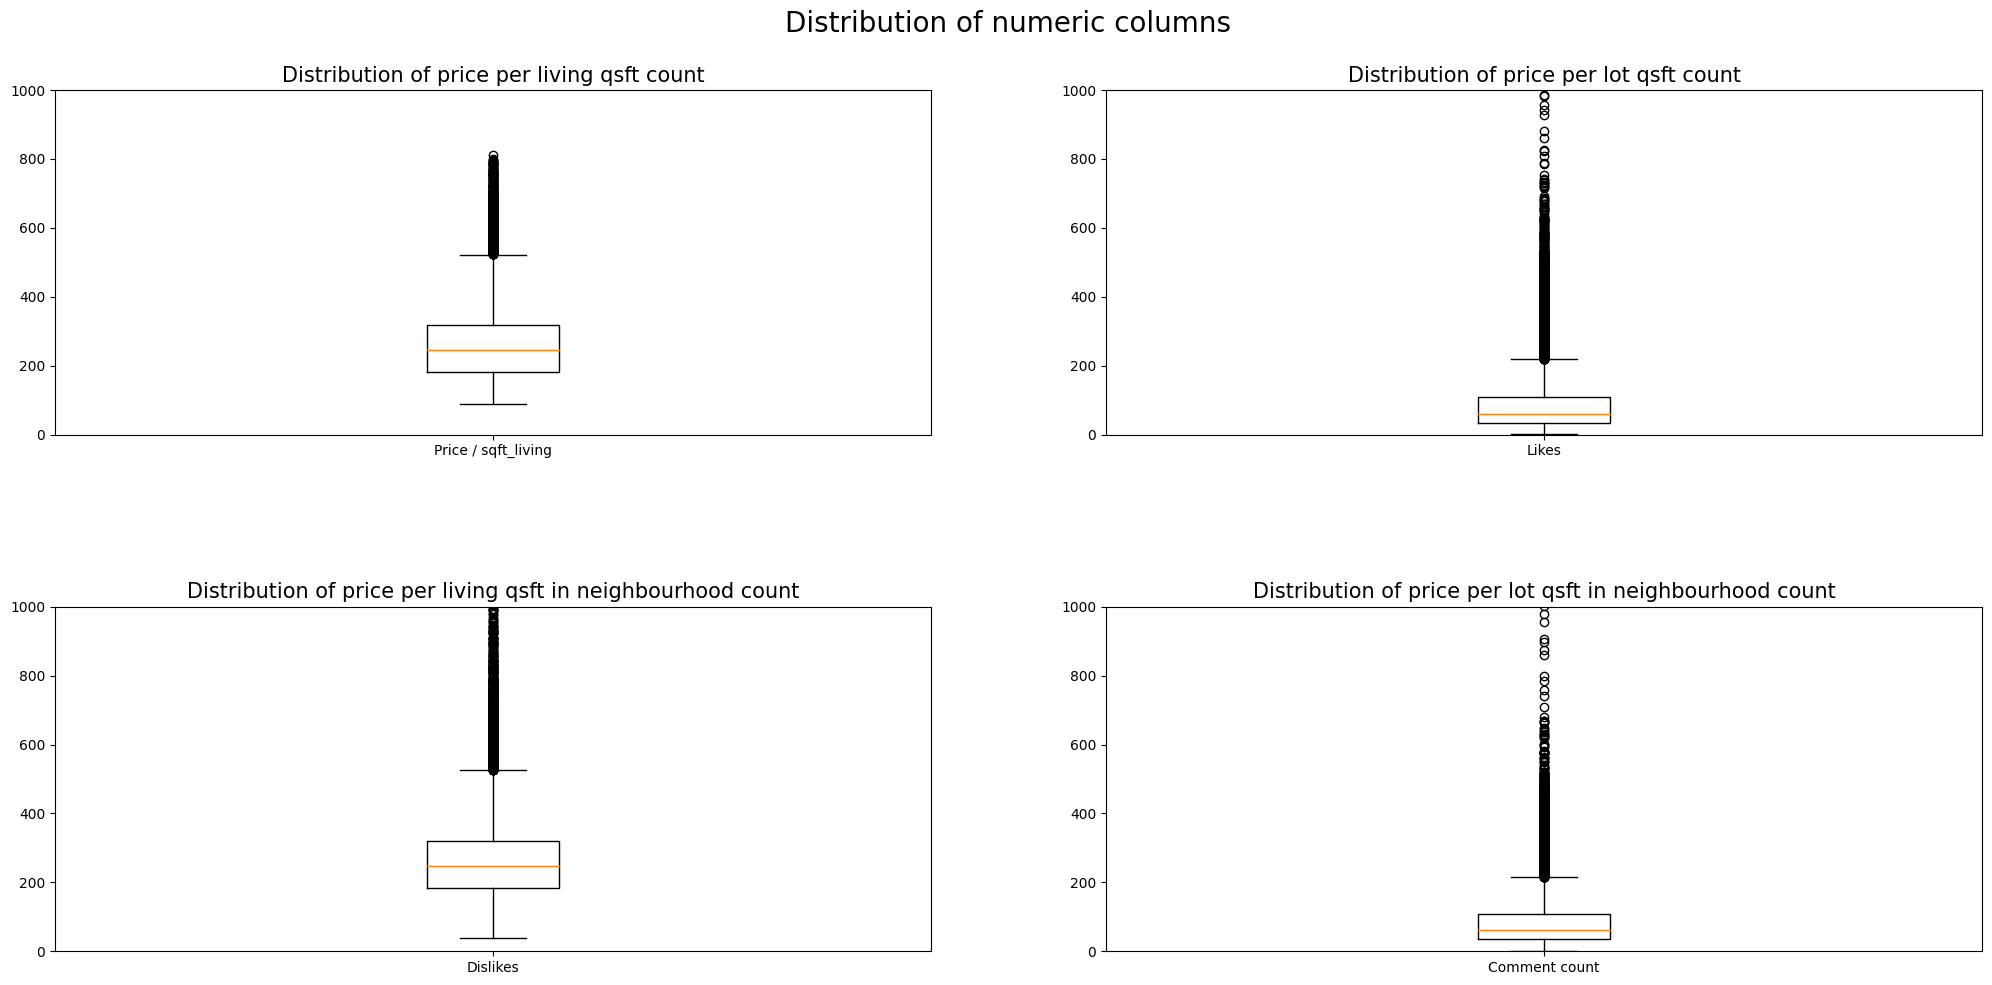

In [265]:
fig, ax = plt.subplots(
    2, 2, figsize=(20, 10)
)  # create subplots on 2 rows and 3 columns
plt.suptitle("Distribution of numeric columns", fontsize=20)
fig.tight_layout()  # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(
    hspace=0.5, wspace=0.2, top=0.9
)  # adjusts the space between the single subplots

ax[0][0].boxplot(x=df["price_per_sqft_living"])  # creates boxplot for number of views
ax[0][0].set_xticklabels(
    labels=["Price / sqft_living"]
)  # sets the label for the ticks on the x-axis
ax[0][0].set_ylim(0, 1000)  # limits the y-axis values from 0 to 2000000
ax[0][0].set_title("Distribution of price per living qsft count", fontsize=15)
# sets title for subplot

ax[0][1].boxplot(x=df["price_per_sqft_lot"])
ax[0][1].set_xticklabels(labels=["Likes"])
ax[0][1].set_ylim(0, 1000)
ax[0][1].set_title("Distribution of price per lot qsft count", fontsize=15)

ax[1][0].boxplot(x=df["price_per_sqft_living15"])
ax[1][0].set_xticklabels(labels=["Dislikes"])
ax[1][0].set_ylim(0, 1000)
ax[1][0].set_title(
    "Distribution of price per living qsft in neighbourhood count", fontsize=15
)

ax[1][1].boxplot(x=df["price_per_sqft_lot15"])
ax[1][1].set_xticklabels(labels=["Comment count"])
ax[1][1].set_ylim(0, 1000)
ax[1][1].set_title(
    "Distribution of price per lot qsft in neighbourhood count", fontsize=15
)

Text(0.5, 1.0, 'Distribution of price per lot qsft in neighbourhood count')

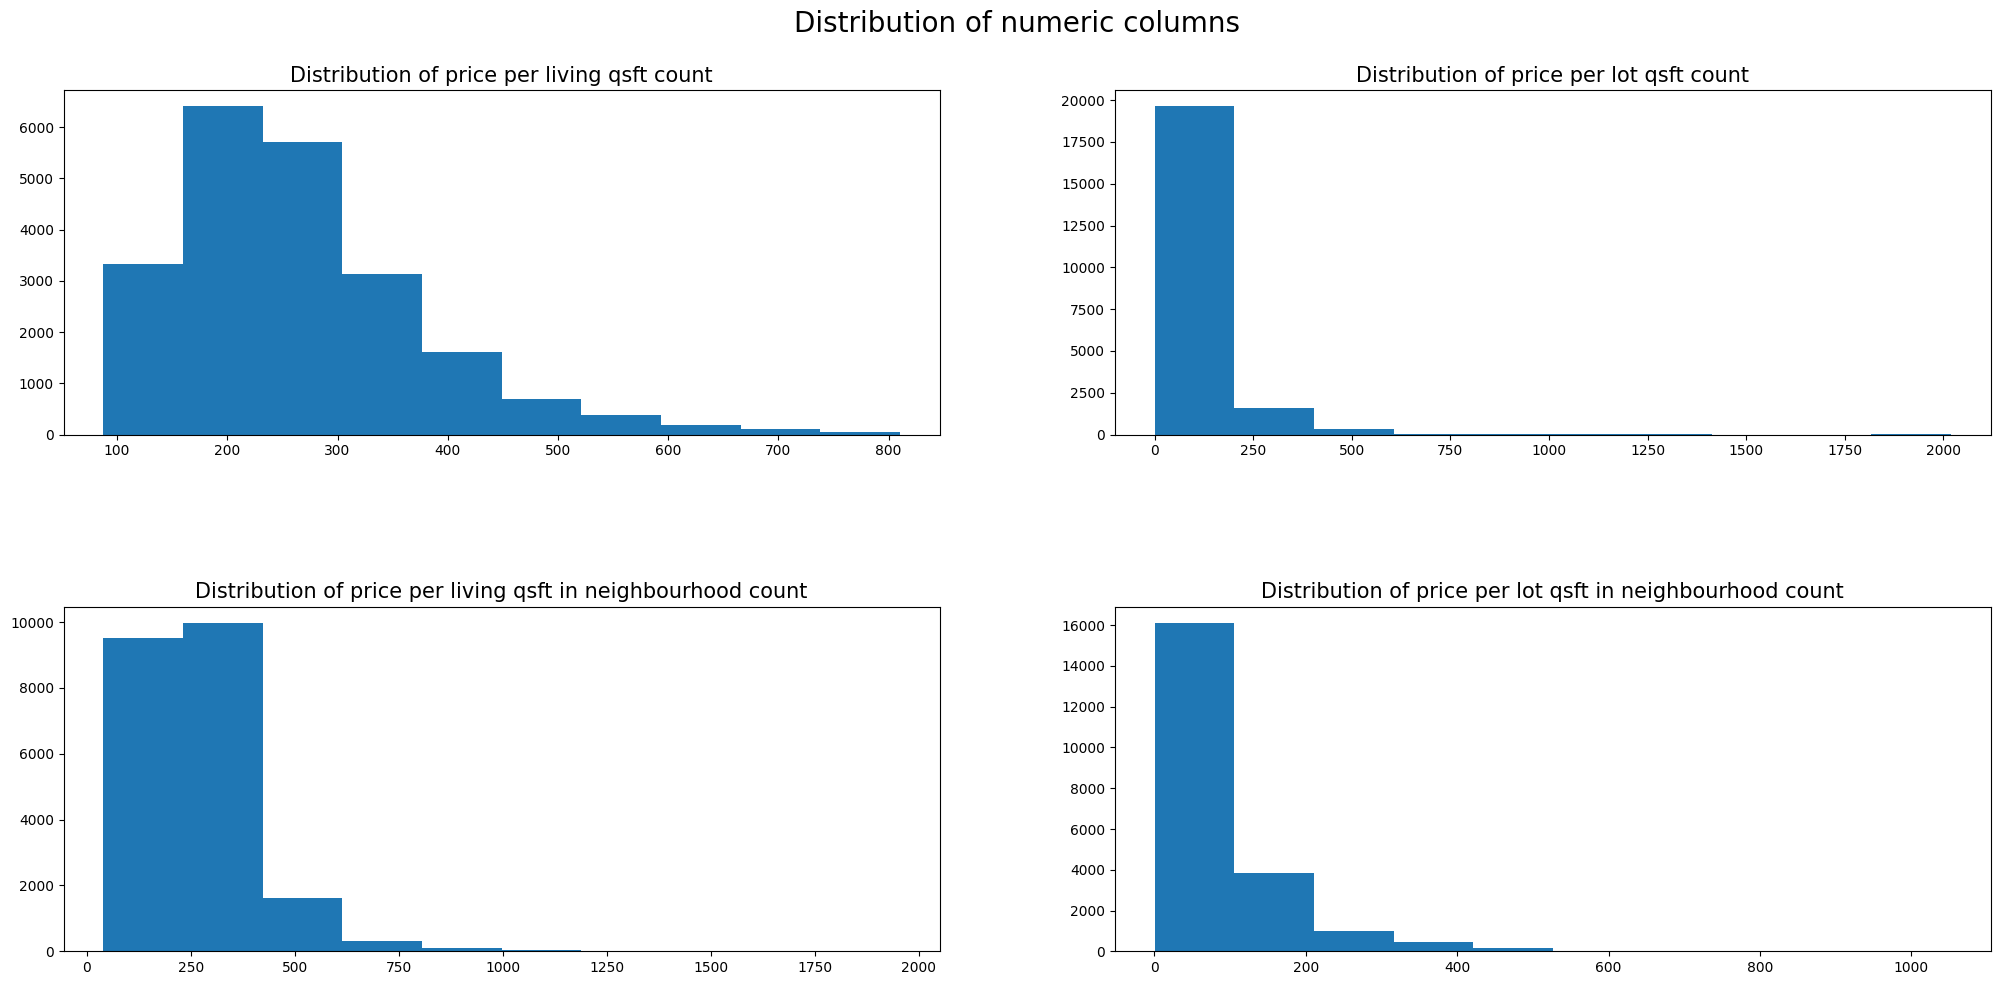

In [266]:
fig, ax = plt.subplots(
    2, 2, figsize=(20, 10)
)  # create subplots on 2 rows and 3 columns
plt.suptitle("Distribution of numeric columns", fontsize=20)
fig.tight_layout()  # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(
    hspace=0.5, wspace=0.2, top=0.9
)  # adjusts the space between the single subplots

ax[0][0].hist(x=df["price_per_sqft_living"])  # creates boxplot for number of views
# ax[0][0].set_xticklabels(labels=["Price / sqft_living"]) # sets the label for the ticks on the x-axis
ax[0][0].set_title("Distribution of price per living qsft count", fontsize=15)
# sets title for subplot

ax[0][1].hist(x=df["price_per_sqft_lot"])
##ax[0][1].set_xticklabels(labels=["Likes"])
ax[0][1].set_title("Distribution of price per lot qsft count", fontsize=15)

ax[1][0].hist(x=df["price_per_sqft_living15"])
# ax[1][0].set_xticklabels(labels=["Dislikes"])
ax[1][0].set_title(
    "Distribution of price per living qsft in neighbourhood count", fontsize=15
)

ax[1][1].hist(x=df["price_per_sqft_lot15"])
# ax[1][1].set_xticklabels(labels=["Comment count"])
ax[1][1].set_title(
    "Distribution of price per lot qsft in neighbourhood count", fontsize=15
)

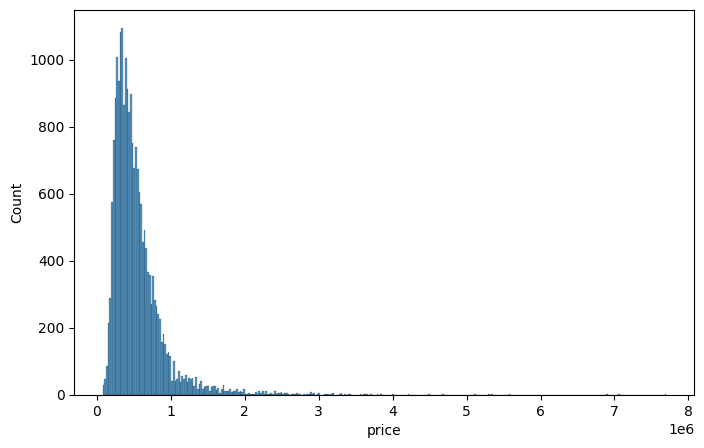

In [267]:
fig = sns.histplot(data=df, x="price")

my customer has no money: so I make a simple differentiation between high and low prices to look for:

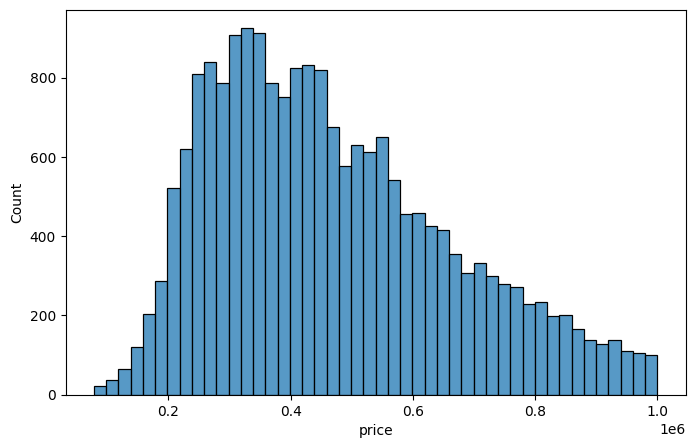

In [268]:
df["affordable"] = df.price.apply(lambda x: True if x < 1000000 else False)
df_customer = df.query("affordable == True")
fig = sns.histplot(data=df, x=df.query("affordable == True")["price"])

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       21597 non-null  int64         
 1   bedrooms                 21597 non-null  int16         
 2   bathrooms                21597 non-null  float64       
 3   sqft_living              21597 non-null  float64       
 4   sqft_lot                 21597 non-null  float64       
 5   floors                   21597 non-null  float64       
 6   waterfront               21597 non-null  bool          
 7   view                     21597 non-null  int16         
 8   condition                21597 non-null  int16         
 9   grade                    21597 non-null  int16         
 10  sqft_above               21597 non-null  float64       
 11  sqft_basement            21597 non-null  float64       
 12  year_built               21597 n

In [272]:
df_customer.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,price,sales_year,sales_month,sales_day,price_per_sqft_living,price_per_sqft_lot,price_per_sqft_living15,price_per_sqft_lot15,price_per_sqft_mean,affordable
0,7129300520,3,1.000,1180.000,5650.000,1.000,False,0,3,7,...,221900.000,2014,10,13,188.051,39.274,165.597,39.274,2053.695,True
1,6414100192,3,2.250,2570.000,7242.000,2.000,False,0,3,7,...,538000.000,2014,12,9,209.339,74.289,318.343,70.428,3200.482,True
2,5631500400,2,1.000,770.000,10000.000,1.000,False,0,3,6,...,180000.000,2015,2,25,233.766,18.000,66.176,22.327,2115.969,True
3,2487200875,4,3.000,1960.000,5000.000,1.000,False,0,5,7,...,604000.000,2014,12,9,308.163,120.800,444.118,120.800,2430.875,True
4,1954400510,3,2.000,1680.000,8080.000,1.000,False,0,3,8,...,510000.000,2015,2,18,303.571,63.119,283.333,67.973,2841.240,True


## Hypotheses
- 'price' and 'sqft_.' correlate and can be combined to a vareable price/mean(sqft_*)
- there is a time in the year when prices drop and houses are cheap
- a whealthy area is not supposed to fit the needs of the customer
- houses not renovated are cheaper

## Correlation of sqft

In [274]:
corr = df_customer[
    ["price", "sqft_living", "sqft_living15", "sqft_lot", "sqft_lot15"]
].corr()

### Plot mean price per square footage for living space per zipcode

In [ ]:
df_zipcodes = (
    df.groupby("zipcode")["lat", "lon", "price_per_sqft_living", "price"]
    .median()
    .reset_index()
)

fig = px.scatter_mapbox(
    df_zipcodes,
    lat="lat",
    lon="lon",
    hover_name="zipcode",
    hover_data=["price"],
    color="price_per_sqft_living",
    size="price",
    zoom=9,
    width=800,
    height=600,
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 10, "t": 10, "l": 10, "b": 10})
fig.show()

<AxesSubplot:xlabel='sales_month', ylabel='price'>

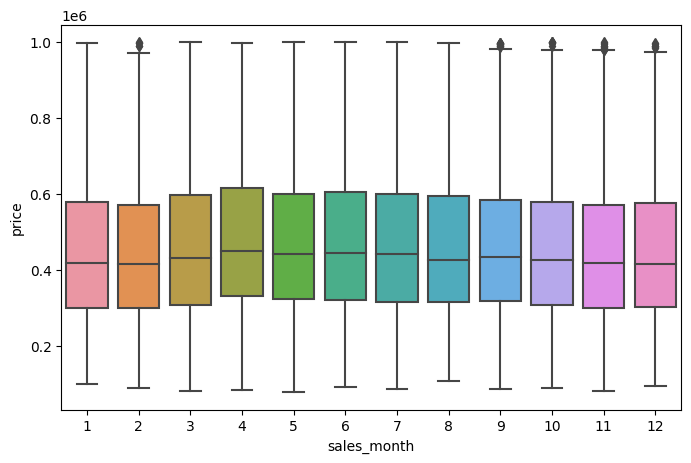

In [ ]:
sns.boxplot(data=df_customer, x="sales_month", y="price")

<AxesSubplot:xlabel='sales_month', ylabel='price'>

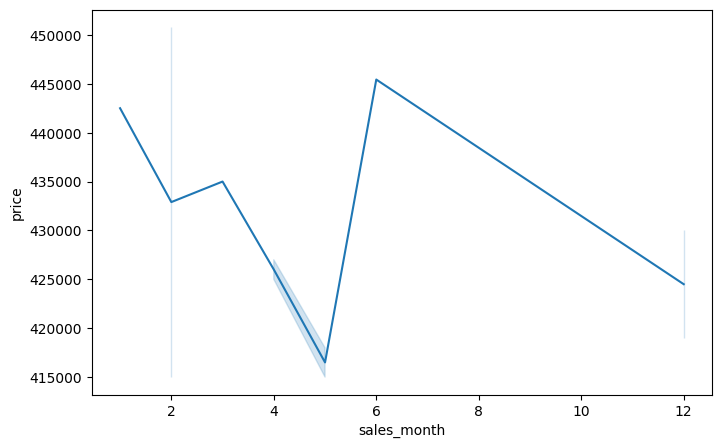

In [ ]:
sns.lineplot(
    x=df_customer.sales_month, y=df_customer.groupby("sales_month")["price"].median()
)

In [ ]:
df

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,price,sales_year,sales_month,sales_day,price_per_sqft_living,price_per_sqft_lot,price_per_sqft_living15,price_per_sqft_lot15,price_per_sqft_mean,affordable
0,7129300520,3,1.000,1180.000,5650.000,1.000,False,0,3,7,...,221900.000,2014,10,13,188.051,39.274,165.597,39.274,2053.695,True
1,6414100192,3,2.250,2570.000,7242.000,2.000,False,0,3,7,...,538000.000,2014,12,9,209.339,74.289,318.343,70.428,3200.482,True
2,5631500400,2,1.000,770.000,10000.000,1.000,False,0,3,6,...,180000.000,2015,2,25,233.766,18.000,66.176,22.327,2115.969,True
3,2487200875,4,3.000,1960.000,5000.000,1.000,False,0,5,7,...,604000.000,2014,12,9,308.163,120.800,444.118,120.800,2430.875,True
4,1954400510,3,2.000,1680.000,8080.000,1.000,False,0,3,8,...,510000.000,2015,2,18,303.571,63.119,283.333,67.973,2841.240,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.500,1530.000,1131.000,3.000,False,0,3,8,...,360000.000,2014,5,21,235.294,318.302,235.294,238.569,1401.515,True
21593,6600060120,4,2.500,2310.000,5813.000,2.000,False,0,3,8,...,400000.000,2015,2,23,173.160,68.811,218.579,55.556,3100.137,True
21594,1523300141,2,0.750,1020.000,1350.000,2.000,False,0,3,7,...,402101.000,2014,6,23,394.217,297.853,394.217,200.349,1250.085,True
21595,291310100,3,2.500,1600.000,2388.000,2.000,False,0,3,8,...,400000.000,2015,1,16,250.000,167.504,283.688,310.800,1581.039,True


In [ ]:
corr = df.corr("pearson")

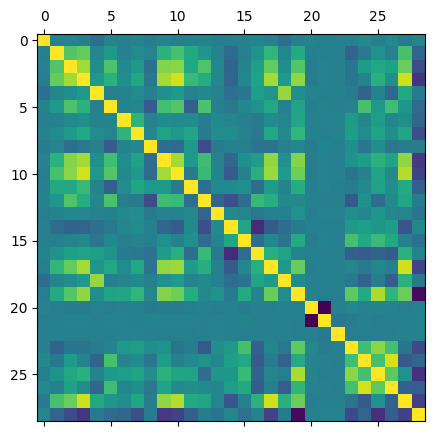

In [ ]:
plt.matshow(df.corr())
plt.show()